In [ ]:
#straight PCA -> Random Forest Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

pca_data = pd.read_csv("pca_data.csv")
processed_data = pd.read_csv("processed_data.csv")
pca_data['Invoice_Quantity'] = processed_data['Invoice Quantity']

#non numeric
if 'City' in pca_data.columns:
    pca_data = pca_data.drop(columns=['City'])

print("Columns in data:", pca_data.columns.tolist())

#X = PCA components; y = "Invoice_Quantity"
y = pca_data['Invoice_Quantity']
X = pca_data.drop(columns=['Invoice_Quantity'])

#(80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the RandomForestRegressor with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Random Forest Regression Model Performance:")
print("R² Score:", r2)
print("RMSE:", rmse)

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.to_csv("rf_predictions.csv", index=False)
print("Predictions saved to rf_predictions.csv")


Columns in data: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'Invoice_Quantity']
Random Forest Regression Model Performance:
R² Score: 0.9929114195130949
RMSE: 2.337678266570578
Predictions saved to rf_predictions.csv


In [13]:
#80-20 separately - then pca on each then train on one test on another

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the PCA-transformed training and test data
pca_train = pd.read_csv("pca_train.csv")
pca_test = pd.read_csv("pca_test.csv")

print("Training Data Columns:", pca_train.columns.tolist())
print("Test Data Columns:", pca_test.columns.tolist())

# Extract the target column ("Invoice Quantity") and features for training and testing
y_train = pca_train['Invoice Quantity']
X_train = pca_train.drop(columns=['Invoice Quantity'])

y_test = pca_test['Invoice Quantity']
X_test = pca_test.drop(columns=['Invoice Quantity'])

# Train the Random Forest model using 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate model performance using R² Score and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Random Forest Regression Model Performance on PCA-transformed data:")
print("R² Score:", r2)
print("RMSE:", rmse)

# Save the actual and predicted values to a CSV file for further analysis
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.to_csv("rf_predictions_from_pca_train_test.csv", index=False)
print("Predictions saved to rf_predictions_from_pca_train_test.csv")


Training Data Columns: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'Invoice Quantity']
Test Data Columns: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'Invoice Quantity']
Random Forest Regression Model Performance on PCA-transformed data:
R² Score: 0.014125161373387596
RMSE: 27.56868131663778
Predictions saved to rf_predictions_from_pca_train_test.csv


Columns in data: ['Invoice Quantity', 'City', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain', 'snowfall', 'snow_depth', 'pressure_msl', 'surface_pressure', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m', 'Day', 'Month', 'Weekday', 'temperature_2m_7day_avg', 'relative_humidity_2m_7day_avg', 'wind_speed_10m_7day_avg']
Random Forest Regression Model Performance:
R² Score: 0.3119543209460588
RMSE: 23.0310499736602
Predictions saved to rf_predictions_processed_data.csv


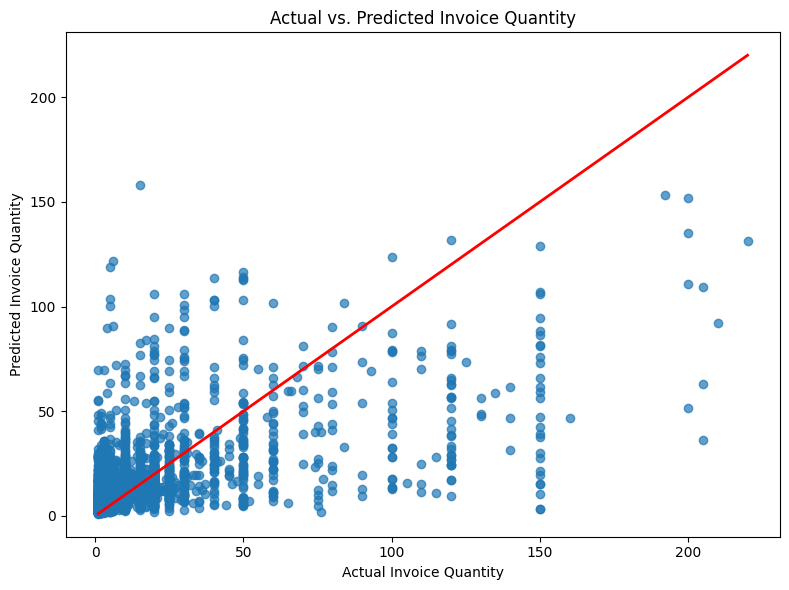

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the processed data
data = pd.read_csv("processed_data.csv")

# Verify columns in the data
print("Columns in data:", data.columns.tolist())

# Drop the non-numeric column "City" (or you could encode it if needed)
if 'City' in data.columns:
    data = data.drop(columns=['City'])

# Ensure that "Invoice Quantity" is present as the target variable
if 'Invoice Quantity' not in data.columns:
    raise ValueError("The target column 'Invoice Quantity' is missing from the data.")

# Separate the predictors (features) and the target variable
X = data.drop(columns=['Invoice Quantity'])
y = data['Invoice Quantity']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize and train the RandomForestRegressor with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the performance of the model using R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Random Forest Regression Model Performance:")
print("R² Score:", r2)
print("RMSE:", rmse)

# Save the actual and predicted values for further analysis
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.to_csv("rf_predictions_processed_data.csv", index=False)
print("Predictions saved to rf_predictions_processed_data.csv")

# Optional: Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Invoice Quantity")
plt.ylabel("Predicted Invoice Quantity")
plt.title("Actual vs. Predicted Invoice Quantity")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.tight_layout()
plt.show()


Columns in data: ['Invoice Quantity', 'City', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain', 'snowfall', 'snow_depth', 'pressure_msl', 'surface_pressure', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m', 'Day', 'Month', 'Weekday', 'temperature_2m_7day_avg', 'relative_humidity_2m_7day_avg', 'wind_speed_10m_7day_avg']
Random Forest Regression Model Performance:
R² Score: 0.3150029889587185
RMSE: 22.97996908013837
Predictions saved to rf_predictions_processed_data_scaled.csv


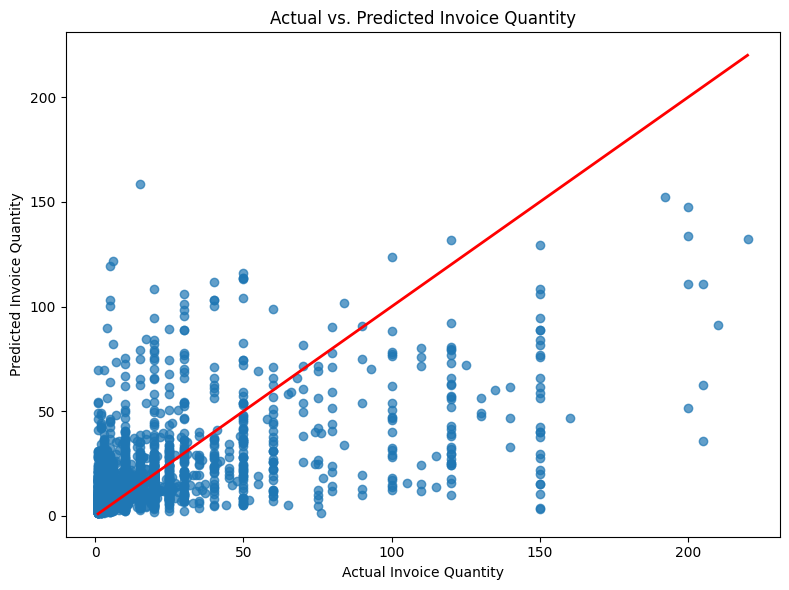

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load processed data
data = pd.read_csv("processed_data.csv")
print("Columns in data:", data.columns.tolist())

# Drop non-numeric columns (e.g., City) if present
if 'City' in data.columns:
    data = data.drop(columns=['City'])

# Confirm the target column is present
if 'Invoice Quantity' not in data.columns:
    raise ValueError("The target column 'Invoice Quantity' is missing from the data.")

# Separate features (X) and target (y)
X = data.drop(columns=['Invoice Quantity'])
y = data['Invoice Quantity']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# -------------------------
# Data Scaling
# -------------------------
# 1. Standardize the features: Center them and scale to unit variance.
standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

# 2. Normalize the standardized features: Scale them to the [0, 1] range.
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train_standardized)
X_test_scaled = min_max_scaler.transform(X_test_standardized)

# -------------------------
# Train the Random Forest model
# -------------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model performance using R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Random Forest Regression Model Performance:")
print("R² Score:", r2)
print("RMSE:", rmse)

# Save the predictions for further analysis
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.to_csv("rf_predictions_processed_data_scaled.csv", index=False)
print("Predictions saved to rf_predictions_processed_data_scaled.csv")

# Plot actual versus predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Invoice Quantity")
plt.ylabel("Predicted Invoice Quantity")
plt.title("Actual vs. Predicted Invoice Quantity")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.tight_layout()
plt.show()


Columns in data: ['Invoice Quantity', 'City', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain', 'snowfall', 'snow_depth', 'pressure_msl', 'surface_pressure', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m', 'Day', 'Month', 'Weekday', 'temperature_2m_7day_avg', 'relative_humidity_2m_7day_avg', 'wind_speed_10m_7day_avg']


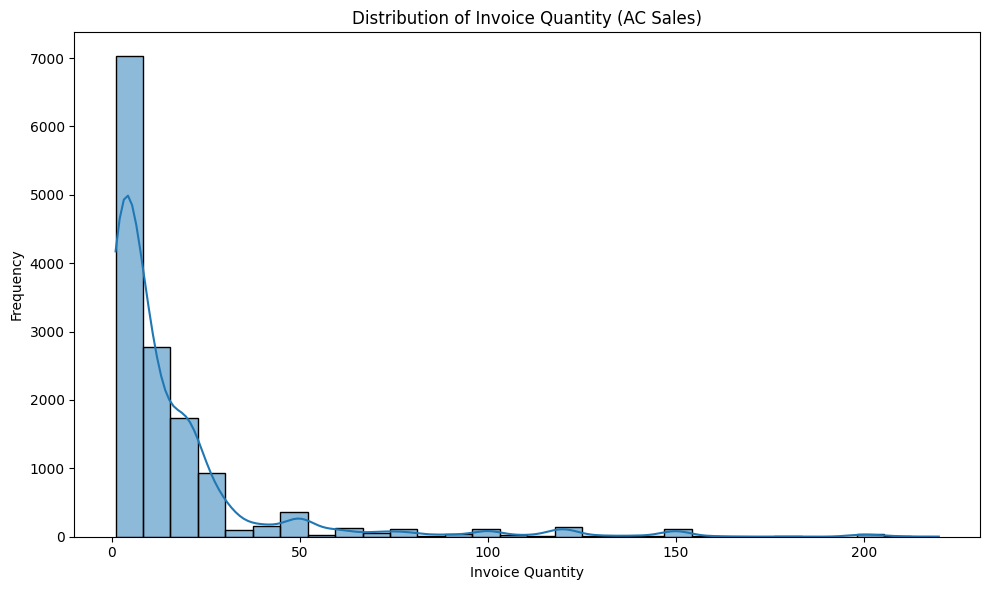

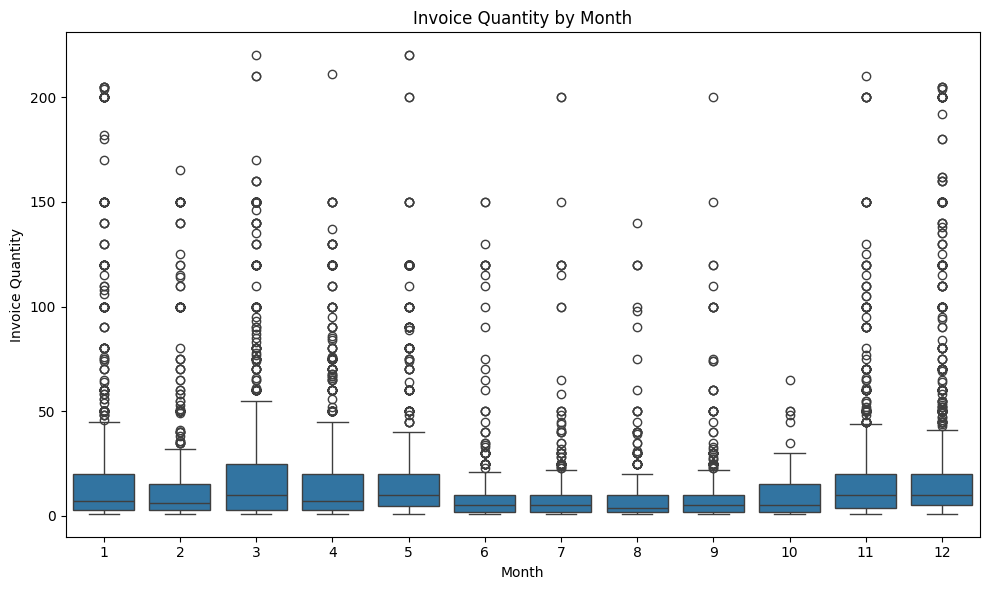

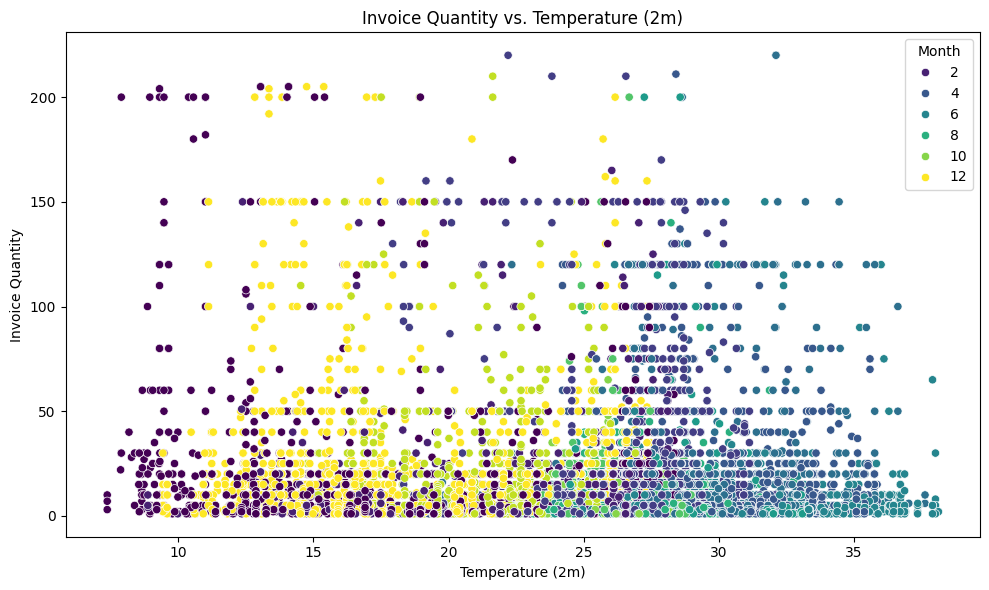

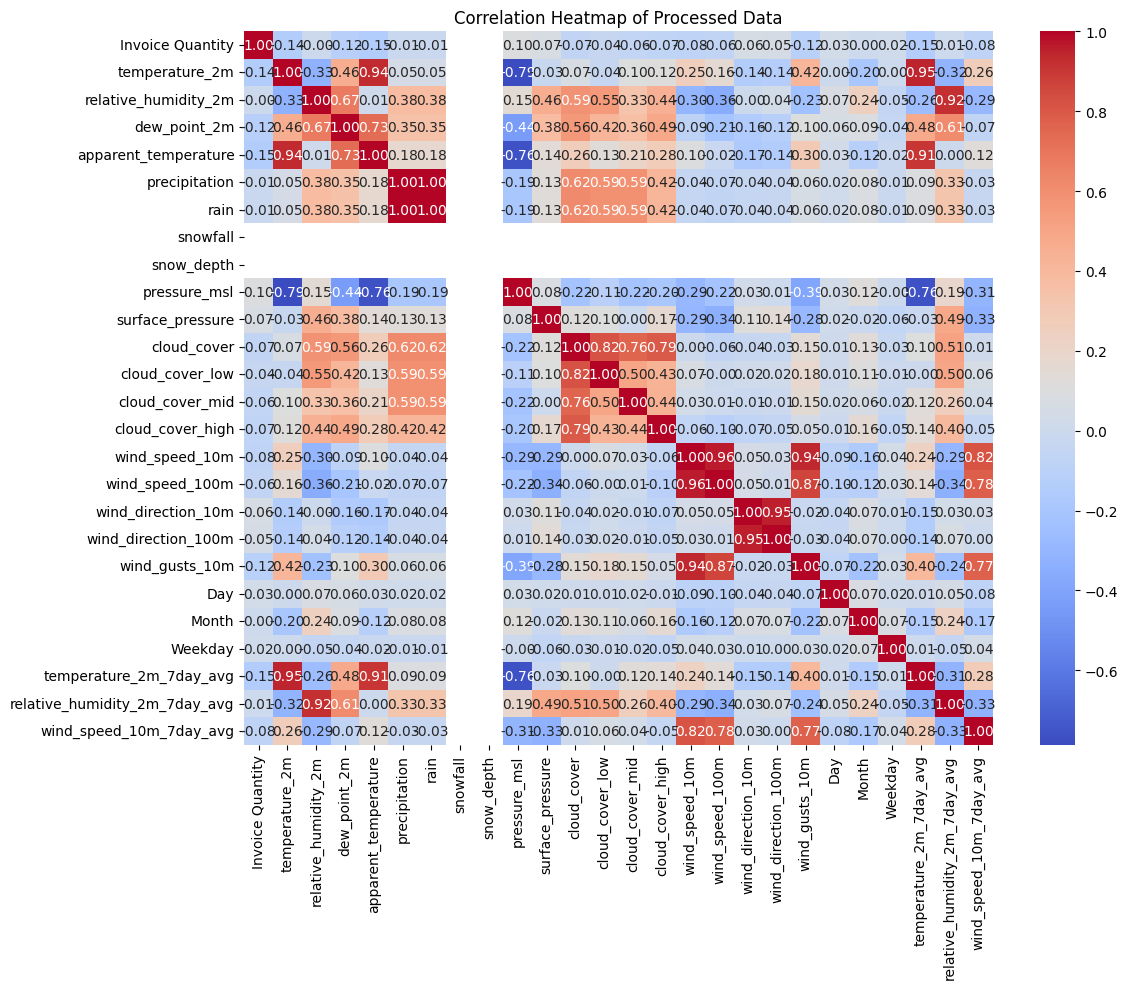

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load processed data
data = pd.read_csv("processed_data.csv")
print("Columns in data:", data.columns.tolist())

# -------------------------
# 1. Plot the Distribution of Sales (Invoice Quantity)
# -------------------------
plt.figure(figsize=(10, 6))
sns.histplot(data['Invoice Quantity'], bins=30, kde=True)
plt.title("Distribution of Invoice Quantity (AC Sales)")
plt.xlabel("Invoice Quantity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# -------------------------
# 2. Plot Sales by Month (Boxplot)
# -------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Invoice Quantity', data=data)
plt.title("Invoice Quantity by Month")
plt.xlabel("Month")
plt.ylabel("Invoice Quantity")
plt.tight_layout()
plt.show()

# -------------------------
# 3. Scatter Plot: Invoice Quantity vs. Temperature
#    This plot shows the relationship between sales and the temperature at 2 meters.
# -------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature_2m', y='Invoice Quantity', data=data, hue='Month', palette='viridis')
plt.title("Invoice Quantity vs. Temperature (2m)")
plt.xlabel("Temperature (2m)")
plt.ylabel("Invoice Quantity")
plt.tight_layout()
plt.show()

# -------------------------
# 4. (Optional) Correlation Heatmap of Numeric Features
# -------------------------
plt.figure(figsize=(12, 10))
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Processed Data")
plt.tight_layout()
plt.show()
